# Applied Machine Learning
## Homework 1 - Logistic Regression
### Problem 1 - Housing Prices

Carlos Ponce (`cmp279`)  
Zachary Hunt (`zh362`)

# Drive Connection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Data Loading

In [ ]:
train_data =  pd.read_csv('train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1.2) **Give** 3 examples of continuous and categorical features in the dataset; choose one feature of each type and plot the histogram to illustrate the distribution.

Three examples of continuous features are: LotArea, LotFrontage, GarageArea
Three examples of categorical features are: YearBuilt, YrSold, GarageCars

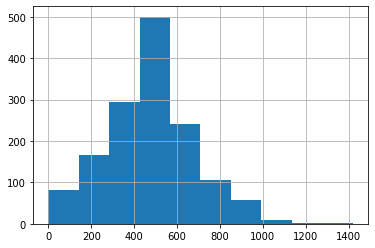

In [ ]:
#Continuous Histogram
train_data.GarageArea.hist()

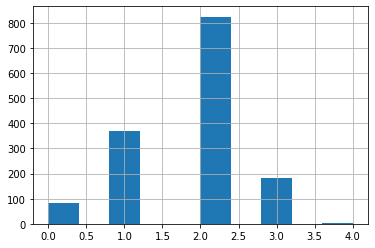

In [ ]:
#Categorical Histrogram 
train_data.GarageCars.hist()

## 1.3,4) Data Preprocessing

For this data set, data preprocessing was difficult. There are many features to handle and many are missing data. This means we not only had to encode our categorical features but also fill in missing data. While some people might just drop rows/columns with missing data. That might lead to an inaccurate model. A lot of the missing data was simply showing the feature was not present in the house. We could represent that by filling the data with 'none' or 0. This would depend on the type of data in the column. For that, I created a list of features with numbers and a list of features with strings. The exception to this was LotFrontage. For this feature, I filled it in with the mean of all LotFrontages. I made this decision as I felt it would affect the data less than making it 0. Once the missing values were handled we could encode the data. This was made simple by using pandas built-in function, get_dummies. Once the data was all ready I returned the filled and encoded data frame. 

In [ ]:
#Here I was checking for which columns had missing data 
pd.isnull(train_data).sum()[pd.isnull(train_data).sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
ints = ['LotArea','OverallQual', 'OverallCond', 'YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold',]

strs = ['MSSubClass', 'MSZoning',  'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle',  
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical',  'KitchenQual',
      'Functional',  'FireplaceQu', 'GarageType',
      'GarageFinish',  'GarageQual',
       'GarageCond', 'PavedDrive',  'PoolQC',
       'Fence', 'MiscFeature',  'SaleType',
       'SaleCondition']

#This function will take in a dataframe and process the data within it 
def process_data2(df):
  f = df.drop('Id', axis=1)

  #fill any nan values:
  f['LotFrontage']= f['LotFrontage'].fillna(f['LotFrontage'].mean(),inplace=True)
  for c in strs: 
    if pd.isnull(f[c]).any():
      f[c] = f[c].fillna('none',inplace=True)
  for c in ints: 
    if pd.isnull(f[c]).any():
      f[c] = f[c].fillna(0,inplace=True)
  
  #now we encode
  f = pd.get_dummies(f)

  #now we can return 
  return f


# One Hot Encoding

In preprocessing we implemented one hot encoding. The features we were really interested in encoding were columns with string values. This is because our OLS model would not be able to handle them. Because of this, we need to convert them into integers so that when we apply linear math we can create a functioning model. A feature that could be encoded would be Street. It contains either gravel or paved. Below we'll see how it looks before and after encoding! 

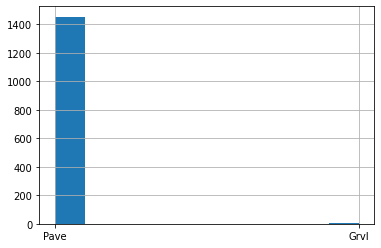

In [ ]:
#preencoded street data
train_data.Street.hist()

Below we see the encoded street data. In the above historgram we see there are very few gravel streets. Below this is still true. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71287627d0>,
      dtype=object)

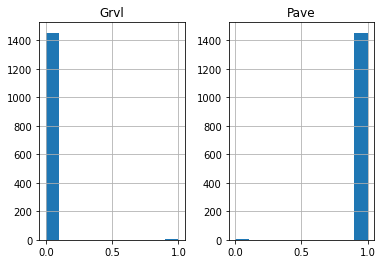

In [ ]:
#encoded Street data
s = pd.get_dummies(train_data.Street)
s.hist()


## 1.5) OLS

In [ ]:
#This class is our OLS model. It will fit the data given and then predict a price 
#an important note to make is our predict function requires a theata_best
#so we should save the theta_best when calling fit
class OLS():
  def fit(self, X_train, y_train):
    theta_best = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
    return theta_best

  def predict(self, X_test, theta_best):
    return X_test.dot(theta_best)

## 1.6) Model Training

In [ ]:
train_data = pd.read_csv('train.csv')

y_train = train_data.SalePrice
x_train = process_data2(train_data.drop(['SalePrice'], axis=1))

model = OLS()
#t is our theta_best which we need for predictions! We'll use it again when predicting our testing data
t = model.fit(x_train,y_train)

In [ ]:
#Here we are using our traing data to create predictions which
#we will compare to our actual Sale Prices
train_pred = model.predict(x_train, t)

print(mean_squared_error(y_train, train_pred))
print(r2_score(y_train,train_pred))

501065280.2743375
0.9205514385818617


## Testing for Kaggle

In [ ]:
test_data = pd.read_csv('test.csv')
x_test = process_data2(test_data)

#this bellow will make sure our columns match after the encoding 
missing_cols = set( x_train.columns ) - set( x_test.columns )
for c in missing_cols:
    x_test[c] = 0


x_test = x_test[x_train.columns]
y = model.predict(x_test, t)
y

0       202789.971355
1       237736.085301
2       262683.904393
3       277171.013005
4       308670.985177
            ...      
1454    185678.578567
1455    172857.588445
1456    230042.264038
1457    209505.996068
1458    306801.262937
Length: 1459, dtype: float64

In [ ]:
#CSV for kaggle
d = {'id': test_data.Id, 'SalePrice': y}
out = pd.DataFrame(d)
out 


,id,SalePrice
0,1461,202789.971355
1,1462,237736.085301
2,1463,262683.904393
3,1464,277171.013005
4,1465,308670.985177
...,...,...
1454,2915,185678.578567
1455,2916,172857.588445
1456,2917,230042.264038
1457,2918,209505.996068



<img src='https://drive.google.com/uc?id=1GPGLVeVG7SHxnzlWXV5tE8VmWwyaf-Cb'>

